In [127]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from pmdarima import auto_arima

In [2]:
df_2012=pd.read_csv('hp_filtered/df_2012.csv',index_col='Date',parse_dates=True)

In [3]:
df_2012.isnull().sum()

SPX Index _trend                                     0
SPX Index _cycle                                     0
VIX Index  (L1)_trend                                0
VIX Index  (L1)_cycle                                0
Freddie Mac 30 Year Mortgage Rate_trend              0
Freddie Mac 30 Year Mortgage Rate_cycle              0
U.S. 5-year Treasury constant maturity rate_trend    0
U.S. 5-year Treasury constant maturity rate_cycle    0
CDX HY Spread_trend                                  0
CDX HY Spread_cycle                                  0
CDX IG Spread_trend                                  0
CDX IG Spread_cycle                                  0
Year                                                 0
Month                                                0
dtype: int64

In [4]:
print(df_2012.index.is_monotonic_increasing) 

False


In [5]:
df_2012=df_2012.sort_index()

In [6]:
print(df_2012.index.to_series().diff().value_counts())

1 days    72
3 days    17
4 days     3
2 days     2
5 days     1
Name: Date, dtype: int64


In [9]:
df_2012=df_2012.asfreq('D')

In [10]:
df_2012.index

DatetimeIndex(['2012-08-09', '2012-08-10', '2012-08-11', '2012-08-12',
               '2012-08-13', '2012-08-14', '2012-08-15', '2012-08-16',
               '2012-08-17', '2012-08-18',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=145, freq='D')

In [11]:
disasters=['2012-10-08','2012-10-29','2012-10-30']
df_2012['Disaster']=0
df_2012.loc[disasters, 'Disaster'] = 1

In [12]:
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday, \
    USMartinLutherKingJr, USPresidentsDay, USMemorialDay, USLaborDay, USColumbusDay, \
    USThanksgivingDay, sunday_to_monday
import pandas as pd

class USFederalHolidays(AbstractHolidayCalendar):
    rules = [
        Holiday('New Years Day', month=1, day=1, observance=nearest_workday),
        USMartinLutherKingJr,
        USPresidentsDay,
        USMemorialDay,
        Holiday('Juneteenth National Independence Day', month=6, day=19, observance=nearest_workday),
        Holiday('Independence Day', month=7, day=4, observance=nearest_workday),
        USLaborDay,
        Holiday('Veterans Day', month=11, day=11, observance=nearest_workday),
        USThanksgivingDay,
        Holiday('Christmas Day', month=12, day=25, observance=nearest_workday),
    ]

# Note: If you specifically want to include or exclude Columbus Day based on its observance status in certain locations,
# you might add or remove the USColumbusDay rule from the above class definition.


In [13]:
from pandas.tseries.offsets import CustomBusinessDay

# Create a custom business day offset that excludes weekends and the defined holidays
custom_bday = CustomBusinessDay(holidays=USFederalHolidays().holidays())

In [14]:
df_2012.isnull().sum()

SPX Index _trend                                     49
SPX Index _cycle                                     49
VIX Index  (L1)_trend                                49
VIX Index  (L1)_cycle                                49
Freddie Mac 30 Year Mortgage Rate_trend              49
Freddie Mac 30 Year Mortgage Rate_cycle              49
U.S. 5-year Treasury constant maturity rate_trend    49
U.S. 5-year Treasury constant maturity rate_cycle    49
CDX HY Spread_trend                                  49
CDX HY Spread_cycle                                  49
CDX IG Spread_trend                                  49
CDX IG Spread_cycle                                  49
Year                                                 49
Month                                                49
Disaster                                              0
dtype: int64

In [15]:
start_date = df_2012.index.min()
end_date = df_2012.index.max()
date_range = pd.date_range(start=start_date, end=end_date, freq=custom_bday)

df_2012 = df_2012.reindex(date_range)

In [16]:
df_2012.index

DatetimeIndex(['2012-08-09', '2012-08-10', '2012-08-13', '2012-08-14',
               '2012-08-15', '2012-08-16', '2012-08-17', '2012-08-20',
               '2012-08-21', '2012-08-22', '2012-08-23', '2012-08-24',
               '2012-08-27', '2012-08-28', '2012-08-29', '2012-08-30',
               '2012-08-31', '2012-09-04', '2012-09-05', '2012-09-06',
               '2012-09-07', '2012-09-10', '2012-09-11', '2012-09-12',
               '2012-09-13', '2012-09-14', '2012-09-17', '2012-09-18',
               '2012-09-19', '2012-09-20', '2012-09-21', '2012-09-24',
               '2012-09-25', '2012-09-26', '2012-09-27', '2012-09-28',
               '2012-10-01', '2012-10-02', '2012-10-03', '2012-10-04',
               '2012-10-05', '2012-10-08', '2012-10-09', '2012-10-10',
               '2012-10-11', '2012-10-12', '2012-10-15', '2012-10-16',
               '2012-10-17', '2012-10-18', '2012-10-19', '2012-10-22',
               '2012-10-23', '2012-10-24', '2012-10-25', '2012-10-26',
      

In [17]:
df_2012.isnull().sum()

SPX Index _trend                                     3
SPX Index _cycle                                     3
VIX Index  (L1)_trend                                3
VIX Index  (L1)_cycle                                3
Freddie Mac 30 Year Mortgage Rate_trend              3
Freddie Mac 30 Year Mortgage Rate_cycle              3
U.S. 5-year Treasury constant maturity rate_trend    3
U.S. 5-year Treasury constant maturity rate_cycle    3
CDX HY Spread_trend                                  3
CDX HY Spread_cycle                                  3
CDX IG Spread_trend                                  3
CDX IG Spread_cycle                                  3
Year                                                 3
Month                                                3
Disaster                                             0
dtype: int64

In [18]:
df_2012=df_2012.fillna(method='bfill')

In [19]:
df_2012.isnull().sum()

SPX Index _trend                                     0
SPX Index _cycle                                     0
VIX Index  (L1)_trend                                0
VIX Index  (L1)_cycle                                0
Freddie Mac 30 Year Mortgage Rate_trend              0
Freddie Mac 30 Year Mortgage Rate_cycle              0
U.S. 5-year Treasury constant maturity rate_trend    0
U.S. 5-year Treasury constant maturity rate_cycle    0
CDX HY Spread_trend                                  0
CDX HY Spread_cycle                                  0
CDX IG Spread_trend                                  0
CDX IG Spread_cycle                                  0
Year                                                 0
Month                                                0
Disaster                                             0
dtype: int64

In [77]:
test=pd.read_csv('hp_filtered/df_2013.csv')

In [78]:
test['Date']=pd.to_datetime(test['Date'])

In [81]:
test.set_index('Date',inplace=True)

In [82]:
test.index

DatetimeIndex(['2013-12-31', '2013-12-30', '2013-12-27', '2013-12-26',
               '2013-12-24', '2013-12-23', '2013-12-20', '2013-12-19',
               '2013-12-18', '2013-12-17',
               ...
               '2013-01-15', '2013-01-14', '2013-01-11', '2013-01-10',
               '2013-01-09', '2013-01-08', '2013-01-07', '2013-01-04',
               '2013-01-03', '2013-01-02'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

In [83]:
test=test[-10:]

In [84]:
test

,SPX Index _trend,SPX Index _cycle,VIX Index (L1)_trend,VIX Index (L1)_cycle,Freddie Mac 30 Year Mortgage Rate_trend,Freddie Mac 30 Year Mortgage Rate_cycle,U.S. 5-year Treasury constant maturity rate_trend,U.S. 5-year Treasury constant maturity rate_cycle,CDX HY Spread_trend,CDX HY Spread_cycle,CDX IG Spread_trend,CDX IG Spread_cycle,Year,Month
Date,,,,,,,,,,,,,,
2013-01-15,1475.387963,-3.047963,13.972089,-0.422089,3.492588,-0.042588,0.798330,-0.048330,445.324528,2.386472,87.557884,1.067116,2013,1
2013-01-14,1472.374749,-1.694749,14.137639,-0.617639,3.487864,-0.017864,0.794390,-0.014390,446.334858,4.684142,87.663768,1.899232,2013,1
2013-01-11,1469.323969,2.726031,14.319951,-0.959951,3.483405,0.016595,0.790571,-0.010571,447.469052,-3.676052,87.795327,-0.576327,2013,1
2013-01-10,1466.245513,5.874487,14.517570,-1.027570,3.479107,0.030893,0.786809,0.013191,448.731108,-12.361108,87.956149,-1.831149,2013,1
2013-01-09,1463.150976,-2.130976,14.728439,-0.918439,3.474873,0.035127,0.783035,-0.013035,450.122725,-4.801725,88.149459,-1.416459,2013,1
2013-01-08,1460.055625,-2.905625,14.949861,-1.329861,3.470631,0.039369,0.779188,0.010812,451.637876,-7.754876,88.377341,-2.752341,2013,1
2013-01-07,1456.973394,4.916606,15.178562,-1.388562,3.466326,0.063674,0.775197,0.044803,453.267534,-12.284534,88.640991,-3.673991,2013,1
2013-01-04,1453.916402,12.553598,15.410441,-1.580441,3.461929,0.078071,0.771001,0.048999,454.997824,-12.478824,88.939887,-3.314887,2013,1
2013-01-03,1450.899840,8.470160,15.640525,-1.080525,3.457453,0.022547,0.766565,0.043435,456.807194,-12.788194,89.271208,-3.646208,2013,1


# SPX

In [85]:
# The seasonal=True flag enables searching for seasonal parameters; m is the seasonal period
model = auto_arima(df_2012['SPX Index _cycle'], seasonal=True, m=12, trace=True, stepwise=True,exog=df_2012['Disaster'])

# Display the best found parameters
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=801.591, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=733.619, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=748.039, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=799.813, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=731.711, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=733.616, Time=0.07 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=730.700, Time=0.03 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=732.694, Time=0.09 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=732.693, Time=0.09 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=732.489, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=730.87

In [21]:
# Extract the best ARIMA and seasonal parameters
order = model.get_params()['order']
seasonal_order = model.get_params()['seasonal_order']

# Fit the SARIMAX model
sarimax_model = SARIMAX(df_2012['SPX Index _cycle'], exog=df_2012['Disaster'],order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = sarimax_model.fit()

# Summary of the model
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:       SPX Index _cycle   No. Observations:                   99
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -354.402
Date:                Sun, 17 Mar 2024   AIC                            716.805
Time:                        21:24:57   BIC                            727.104
Sample:                    08-09-2012   HQIC                           720.969
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Disaster      -3.6678      7.245     -0.506      0.613     -17.867      10.531
ar.L1          0.8583      0.101      8.496      0.000       0.660       1.056
ar.L2         -0.1862      0.117     -1.592      0.1

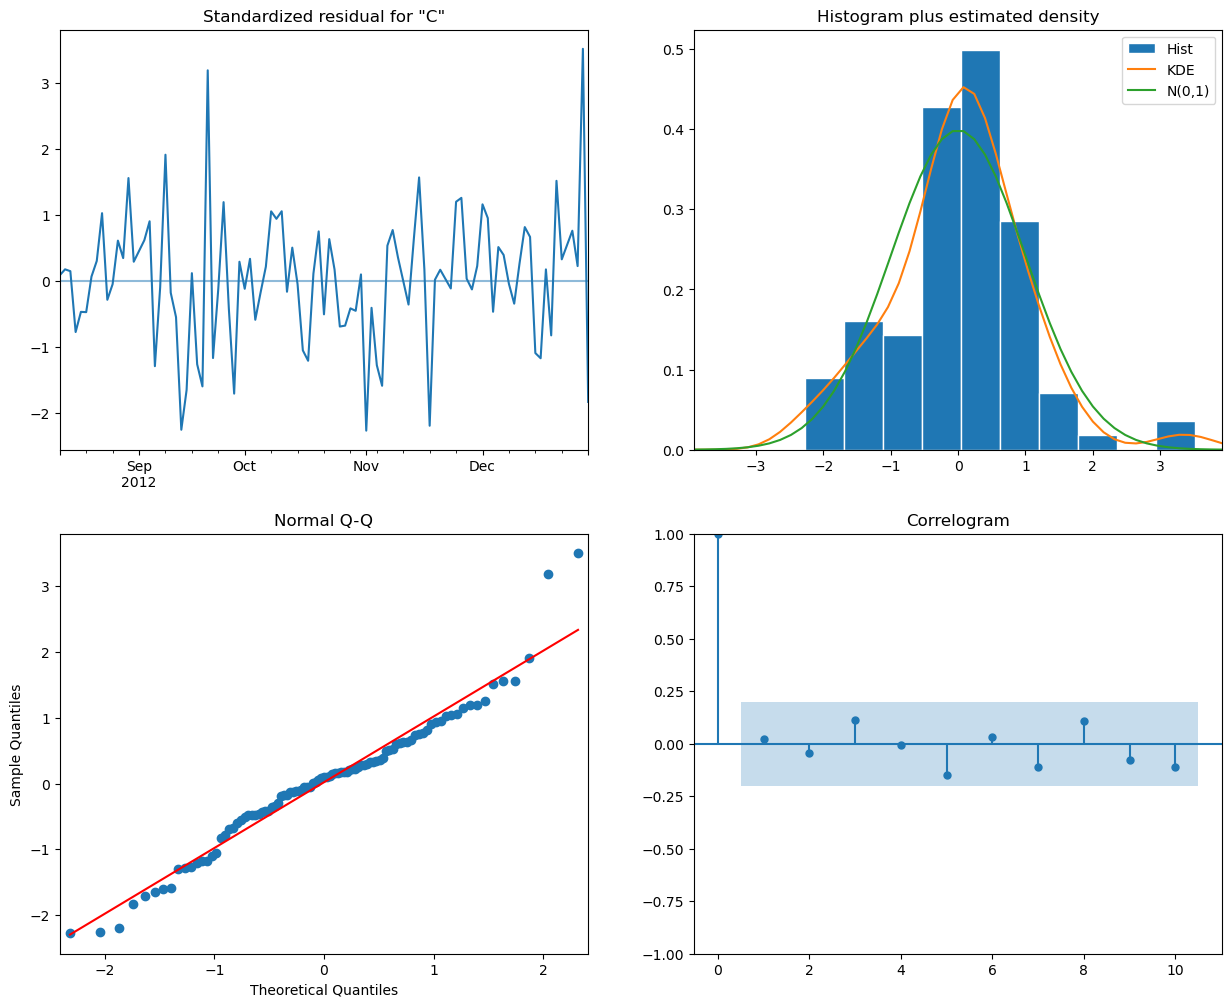

CDX IG Spread_cycle      mean   mean_se  mean_ci_lower  mean_ci_upper
2013-01-02           2.079338  2.016957      -1.873825       6.032501
2013-01-03           0.147571  2.544011      -4.838598       5.133740
2013-01-04          -1.513433  2.735894      -6.875687       3.848820
2013-01-07          -2.787457  2.772147      -8.220765       2.645852
2013-01-08          -3.611775  2.772555      -9.045883       1.822333
2013-01-09          -3.975173  2.817577      -9.497523       1.547178
2013-01-10          -3.911408  2.936330      -9.666509       1.843692
2013-01-11          -3.489414  3.110214      -9.585321       2.606494
2013-01-14          -2.801634  3.298431      -9.266441       3.663173
2013-01-15          -1.951874  3.463685      -8.740572       4.836824


In [139]:
# Diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecasting
forecast_result = results.get_forecast(steps=10,exog=df_2012['Disaster'].tail(10))
forecast_summary = forecast_result.summary_frame()
print(forecast_summary)


In [140]:
forecasted_mean=forecast_result.predicted_mean
forecasted_mean_array=np.array(forecasted_mean)
forecast_dates=pd.date_range(start='2013-01-02',end='2013-01-15',freq=custom_bday)

In [141]:
df_2012.index.max()

Timestamp('2012-12-31 00:00:00', freq='C')

In [142]:
row=df_2012.loc[df_2012.index.max()]

In [143]:
row['SPX Index _cycle']

-18.895448673217743

In [144]:
def create_forecast(df,arr,val):
    date=df.index.max()
    row=df.loc[date]
    target=row[val]
    ret=[target+mean for mean in arr]
    return ret

In [145]:
forecast=create_forecast(df_2012,forecasted_mean_array,'SPX Index _cycle')

In [146]:
forecast

[-16.816111037026722,
 -18.747877209508662,
 -20.40888186785146,
 -21.68290530587654,
 -22.50722350027227,
 -22.87062121949152,
 -22.806856680943415,
 -22.38486218061491,
 -21.6970826481036,
 -20.84732252520555]

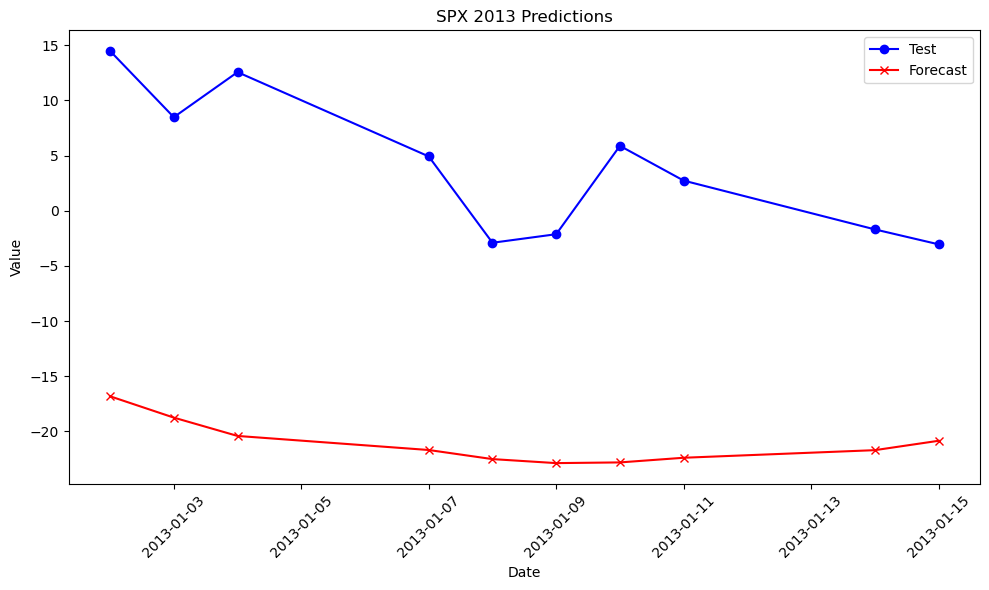

In [147]:
plt.figure(figsize=(10,6))

plt.plot(test.index,test['SPX Index _cycle'],label='Test',color='blue',marker='o')
plt.plot(forecast_dates,forecast,label='Forecast',color='red',marker='x')
plt.title('SPX 2013 Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# VIX

In [23]:
# The seasonal=True flag enables searching for seasonal parameters; m is the seasonal period
model = auto_arima(df_2012['VIX Index  (L1)_cycle'], seasonal=True, m=12, trace=True, stepwise=True,exog=df_2012['Disaster'])

# Display the best found parameters
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=329.724, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=278.504, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=290.083, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=329.172, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=278.454, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=278.344, Time=0.08 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=280.183, Time=0.19 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=322.617, Time=0.08 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=280.213, Time=0.13 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=280.221, Time=0.12 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=281.738, Time=0.12 sec
 ARIMA(1,0,0)(0,0,1)[12]             : AIC=27

In [24]:
# Extract the best ARIMA and seasonal parameters
order = model.get_params()['order']
seasonal_order = model.get_params()['seasonal_order']

# Fit the SARIMAX model
sarimax_model = SARIMAX(df_2012['VIX Index  (L1)_cycle'], exog=df_2012['Disaster'],order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = sarimax_model.fit()

# Summary of the model
print(results.summary())


                                      SARIMAX Results                                       
Dep. Variable:                VIX Index  (L1)_cycle   No. Observations:                   99
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -119.711
Date:                              Sun, 17 Mar 2024   AIC                            247.421
Time:                                      21:28:21   BIC                            257.239
Sample:                                  08-09-2012   HQIC                           251.373
                                       - 12-31-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Disaster       0.8715      1.017      0.857      0.392      -1.123       2.866
ar.L1          0.64

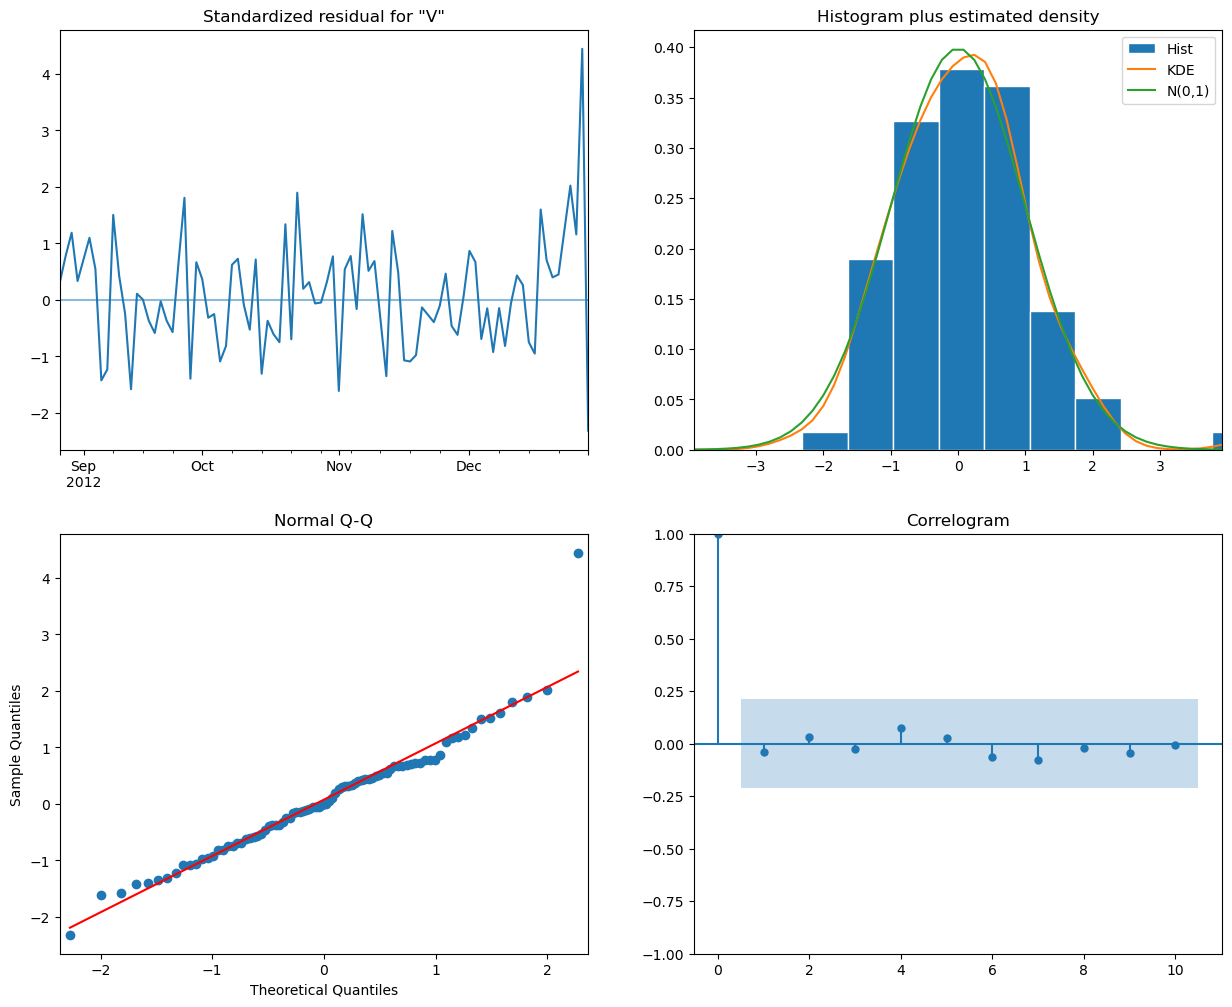

VIX Index  (L1)_cycle      mean   mean_se  mean_ci_lower  mean_ci_upper
2013-01-02             1.167803  0.969964      -0.733291       3.068897
2013-01-03             0.698578  1.155254      -1.565678       2.962834
2013-01-04             0.613390  1.224511      -1.786608       3.013388
2013-01-07             0.601697  1.252362      -1.852888       3.056282
2013-01-08             0.044141  1.263837      -2.432935       2.521216
2013-01-09            -0.122991  1.268609      -2.609419       2.363437
2013-01-10            -0.165703  1.270601      -2.656035       2.324629
2013-01-11            -0.204111  1.271434      -2.696076       2.287853
2013-01-14            -0.568300  1.271782      -3.060947       1.924347
2013-01-15            -0.617493  1.271928      -3.110426       1.875440


In [25]:
# Diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecasting
forecast = results.get_forecast(steps=10,exog=df_2012['Disaster'].tail(10))
forecast_summary = forecast.summary_frame()
print(forecast_summary)


# Freddie

In [26]:
# The seasonal=True flag enables searching for seasonal parameters; m is the seasonal period
model = auto_arima(df_2012['Freddie Mac 30 Year Mortgage Rate_cycle'], seasonal=True, m=12, trace=True, stepwise=True,exog=df_2012['Disaster'])

# Display the best found parameters
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-456.644, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-394.938, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-454.059, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-445.905, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-396.844, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-458.617, Time=0.48 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-460.573, Time=0.23 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-458.636, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=-458.214, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=-465.471, Time=0.18 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=-460.544, Time=0.35 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=-460.537, Time=0.37 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=-459.197, Time=0.36 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-459.343, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0

In [27]:
# Extract the best ARIMA and seasonal parameters
order = model.get_params()['order']
seasonal_order = model.get_params()['seasonal_order']

# Fit the SARIMAX model
sarimax_model = SARIMAX(df_2012['Freddie Mac 30 Year Mortgage Rate_cycle'], exog=df_2012['Disaster'],order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = sarimax_model.fit()

# Summary of the model
print(results.summary())


                                          SARIMAX Results                                          
Dep. Variable:     Freddie Mac 30 Year Mortgage Rate_cycle   No. Observations:                   99
Model:                                    SARIMAX(2, 0, 1)   Log Likelihood                 232.104
Date:                                     Sun, 17 Mar 2024   AIC                           -454.208
Time:                                             21:29:40   BIC                           -441.334
Sample:                                         08-09-2012   HQIC                          -449.002
                                              - 12-31-2012                                         
Covariance Type:                                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Disaster      -0.0044      0.043     -0.10

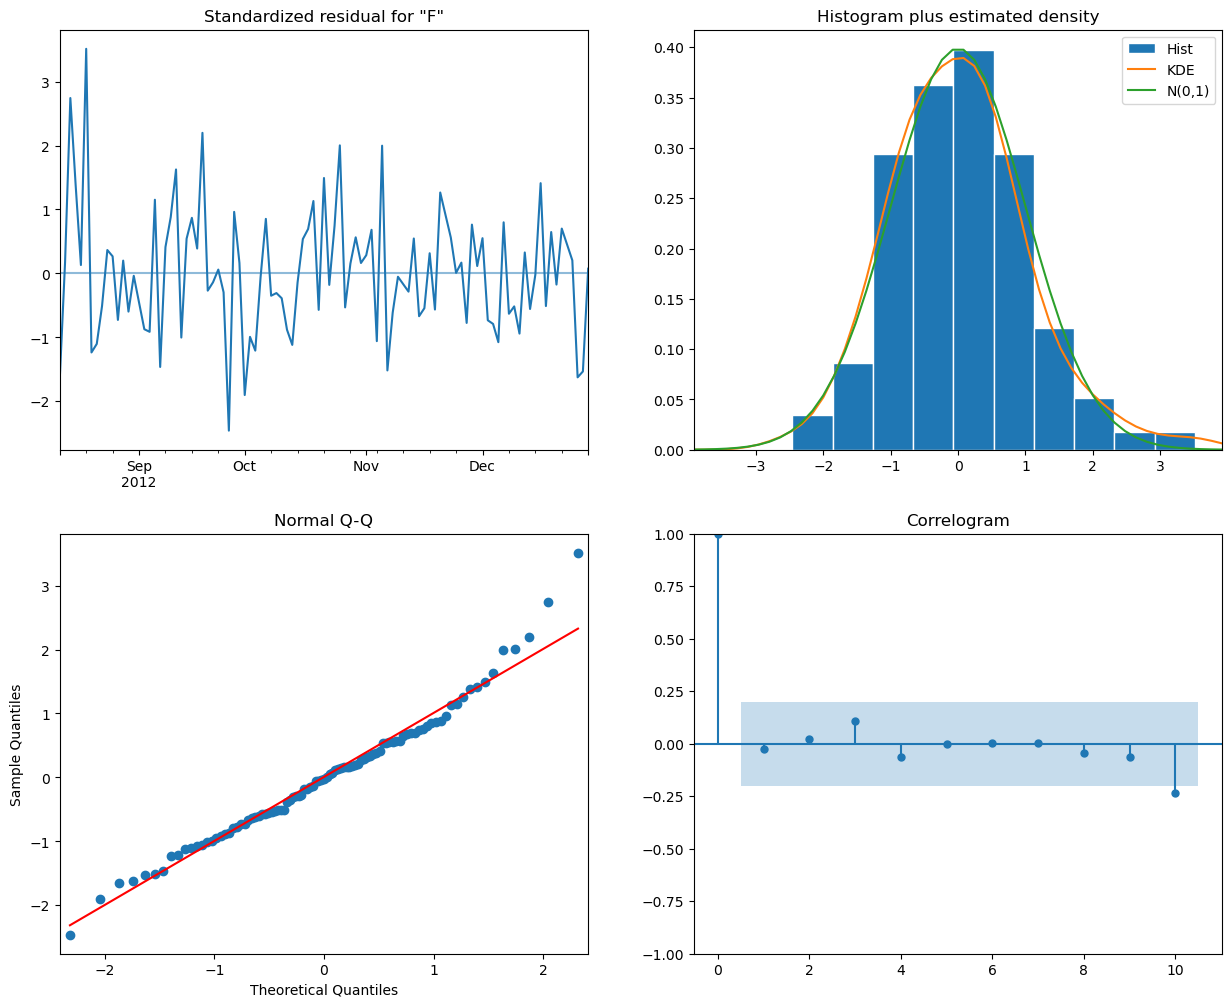

Freddie Mac 30 Year Mortgage Rate_cycle      mean   mean_se  mean_ci_lower  \
2013-01-02                              -0.026607  0.022082      -0.069886   
2013-01-03                              -0.006718  0.028776      -0.063118   
2013-01-04                               0.006370  0.030863      -0.054120   
2013-01-07                               0.011908  0.031105      -0.049057   
2013-01-08                               0.011627  0.031133      -0.049393   
2013-01-09                               0.008156  0.031371      -0.053331   
2013-01-10                               0.003882  0.031650      -0.058151   
2013-01-11                               0.000375  0.031809      -0.061970   
2013-01-14                              -0.001703  0.031855      -0.064137   
2013-01-15                              -0.002384  0.031857      -0.064824   

Freddie Mac 30 Year Mortgage Rate_cycle  mean_ci_upper  
2013-01-02                                    0.016672  
2013-01-03                 

In [28]:
# Diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecasting
forecast = results.get_forecast(steps=10,exog=df_2012['Disaster'].tail(10))
forecast_summary = forecast.summary_frame()
print(forecast_summary)


# Treasure

In [29]:
# The seasonal=True flag enables searching for seasonal parameters; m is the seasonal period
model = auto_arima(df_2012['U.S. 5-year Treasury constant maturity rate_cycle'], seasonal=True, m=12, trace=True, stepwise=True,exog=df_2012['Disaster'])

# Display the best found parameters
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-423.458, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-349.414, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-430.733, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-408.966, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-351.404, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-430.204, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=-431.691, Time=0.52 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=-429.796, Time=0.73 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=-430.896, Time=0.26 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=-362.457, Time=0.23 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=-430.340, Time=0.70 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=-430.176, Time=0.70 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=-405.901, Time=0.41 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=-427.805, Time=0.85 sec
 ARIMA(1,0,0)(2,0,0

In [30]:
# Extract the best ARIMA and seasonal parameters
order = model.get_params()['order']
seasonal_order = model.get_params()['seasonal_order']

# Fit the SARIMAX model
sarimax_model = SARIMAX(df_2012['U.S. 5-year Treasury constant maturity rate_cycle'], exog=df_2012['Disaster'],order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = sarimax_model.fit()

# Summary of the model
print(results.summary())


                                               SARIMAX Results                                               
Dep. Variable:     U.S. 5-year Treasury constant maturity rate_cycle   No. Observations:                   99
Model:                                SARIMAX(1, 0, 0)x(2, 0, 0, 12)   Log Likelihood                 172.368
Date:                                               Sun, 17 Mar 2024   AIC                           -334.735
Time:                                                       21:31:35   BIC                           -323.215
Sample:                                                   08-09-2012   HQIC                          -330.139
                                                        - 12-31-2012                                         
Covariance Type:                                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

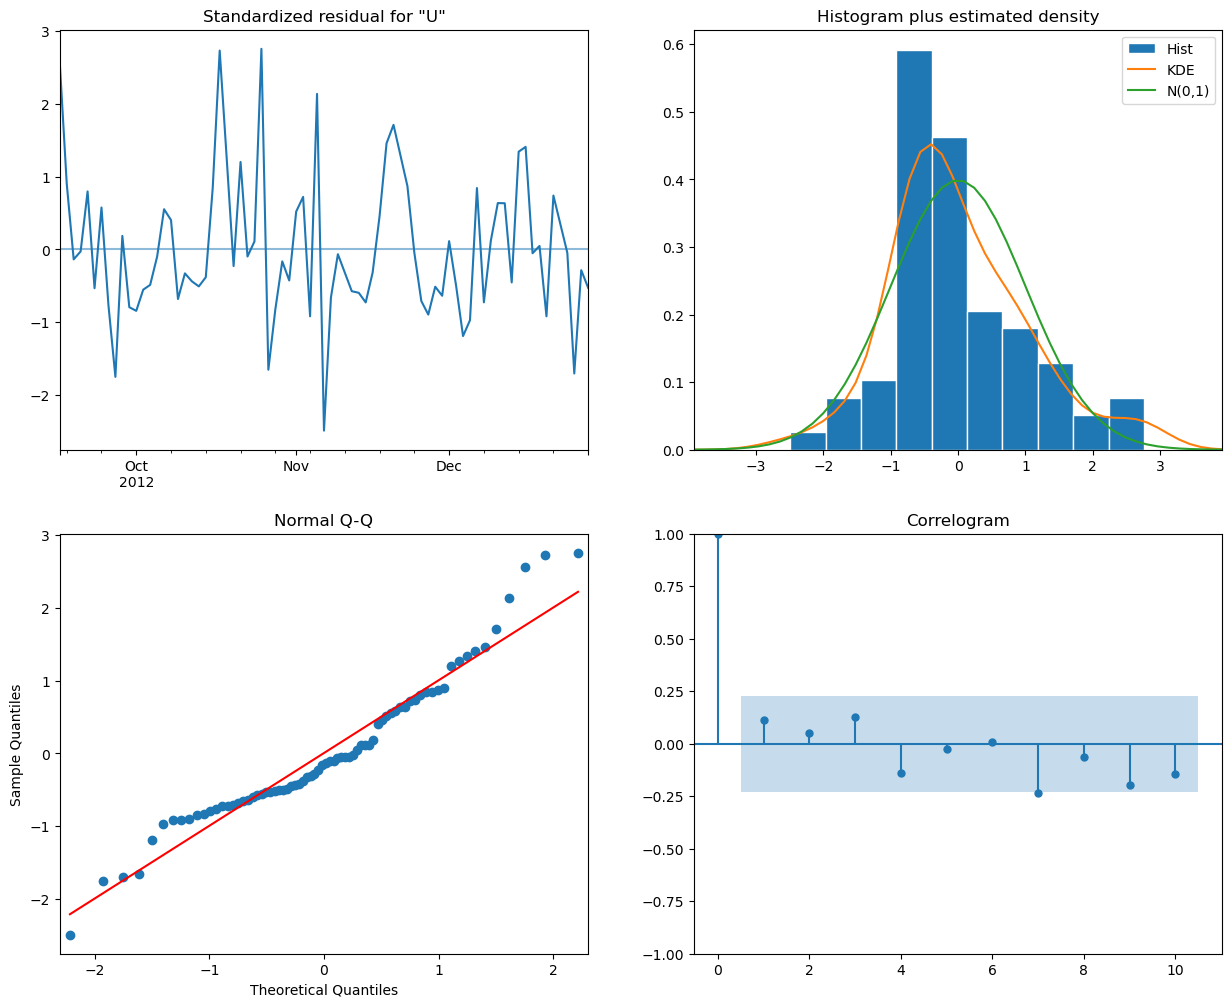

U.S. 5-year Treasury constant maturity rate_cycle      mean   mean_se  \
2013-01-02                                        -0.031156  0.023555   
2013-01-03                                        -0.020696  0.029978   
2013-01-04                                        -0.019262  0.033344   
2013-01-07                                        -0.016823  0.035270   
2013-01-08                                        -0.014881  0.036412   
2013-01-09                                        -0.011238  0.037102   
2013-01-10                                        -0.001221  0.037523   
2013-01-11                                         0.000608  0.037782   
2013-01-14                                        -0.000632  0.037942   
2013-01-15                                         0.009960  0.038040   

U.S. 5-year Treasury constant maturity rate_cycle  mean_ci_lower  \
2013-01-02                                             -0.077322   
2013-01-03                                             -0.07

In [31]:
# Diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecasting
forecast = results.get_forecast(steps=10,exog=df_2012['Disaster'].tail(10))
forecast_summary = forecast.summary_frame()
print(forecast_summary)


# HY

In [32]:
# The seasonal=True flag enables searching for seasonal parameters; m is the seasonal period
model = auto_arima(df_2012['CDX HY Spread_cycle'], seasonal=True, m=12, trace=True, stepwise=True,exog=df_2012['Disaster'])

# Display the best found parameters
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=862.405, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=767.940, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=791.699, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=860.697, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=766.152, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=767.959, Time=0.10 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=769.880, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=764.193, Time=0.07 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=765.083, Time=0.23 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=765.122, Time=0.18 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=767.066, Time=0.28 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=764.757, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AI

In [33]:
# Extract the best ARIMA and seasonal parameters
order = model.get_params()['order']
seasonal_order = model.get_params()['seasonal_order']

# Fit the SARIMAX model
sarimax_model = SARIMAX(df_2012['CDX HY Spread_cycle'], exog=df_2012['Disaster'],order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = sarimax_model.fit()

# Summary of the model
print(results.summary())


                                SARIMAX Results                                
Dep. Variable:     CDX HY Spread_cycle   No. Observations:                   99
Model:                SARIMAX(2, 0, 0)   Log Likelihood                -370.513
Date:                 Sun, 17 Mar 2024   AIC                            749.026
Time:                         21:37:18   BIC                            759.325
Sample:                     08-09-2012   HQIC                           753.190
                          - 12-31-2012                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Disaster       4.2623     10.846      0.393      0.694     -16.996      25.520
ar.L1          0.9760      0.072     13.509      0.000       0.834       1.118
ar.L2         -0.2299      0.120     -1.923 

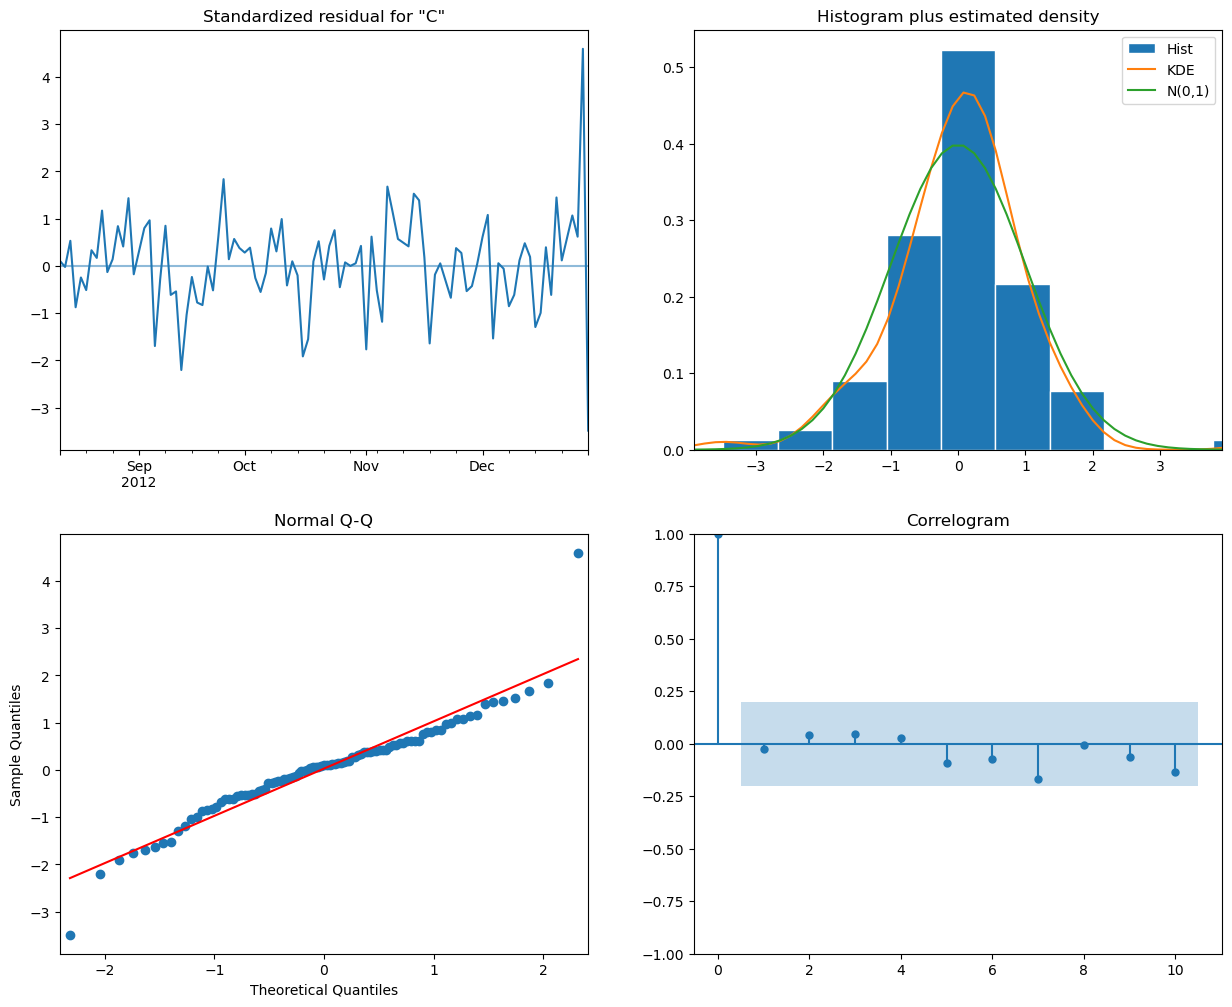

CDX HY Spread_cycle      mean    mean_se  mean_ci_lower  mean_ci_upper
2013-01-02           7.302967  11.031778     -14.318920      28.924855
2013-01-03           1.651928  15.415300     -28.561506      31.865361
2013-01-04          -0.066383  17.355147     -34.081845      33.949079
2013-01-07          -0.444508  18.148375     -36.014669      35.125653
2013-01-08          -0.418586  18.454394     -36.588533      35.751361
2013-01-09          -0.306369  18.567540     -36.698079      36.085342
2013-01-10          -0.202802  18.608122     -36.674051      36.268448
2013-01-11          -0.127514  18.622371     -36.626691      36.371663
2013-01-14          -0.077839  18.627302     -36.586679      36.431002
2013-01-15          -0.046661  18.628991     -36.558811      36.465490


In [34]:
# Diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecasting
forecast = results.get_forecast(steps=10,exog=df_2012['Disaster'].tail(10))
forecast_summary = forecast.summary_frame()
print(forecast_summary)


# IG

In [35]:
# The seasonal=True flag enables searching for seasonal parameters; m is the seasonal period
model = auto_arima(df_2012['CDX IG Spread_cycle'], seasonal=True, m=12, trace=True, stepwise=True,exog=df_2012['Disaster'])

# Display the best found parameters
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=544.803, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=450.564, Time=0.04 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=479.245, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=543.082, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=448.755, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=450.563, Time=0.05 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=452.564, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=444.912, Time=0.03 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=446.852, Time=0.03 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=446.849, Time=0.07 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=445.276, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=44

In [36]:
# Extract the best ARIMA and seasonal parameters
order = model.get_params()['order']
seasonal_order = model.get_params()['seasonal_order']

# Fit the SARIMAX model
sarimax_model = SARIMAX(df_2012['CDX IG Spread_cycle'], exog=df_2012['Disaster'],order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = sarimax_model.fit()

# Summary of the model
print(results.summary())


                                SARIMAX Results                                
Dep. Variable:     CDX IG Spread_cycle   No. Observations:                   99
Model:                SARIMAX(2, 0, 1)   Log Likelihood                -207.492
Date:                 Sun, 17 Mar 2024   AIC                            424.983
Time:                         21:38:54   BIC                            437.857
Sample:                     08-09-2012   HQIC                           430.189
                          - 12-31-2012                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Disaster       1.1452      1.110      1.032      0.302      -1.030       3.320
ar.L1          1.7587      0.046     38.538      0.000       1.669       1.848
ar.L2         -0.8527      0.049    -17.575 

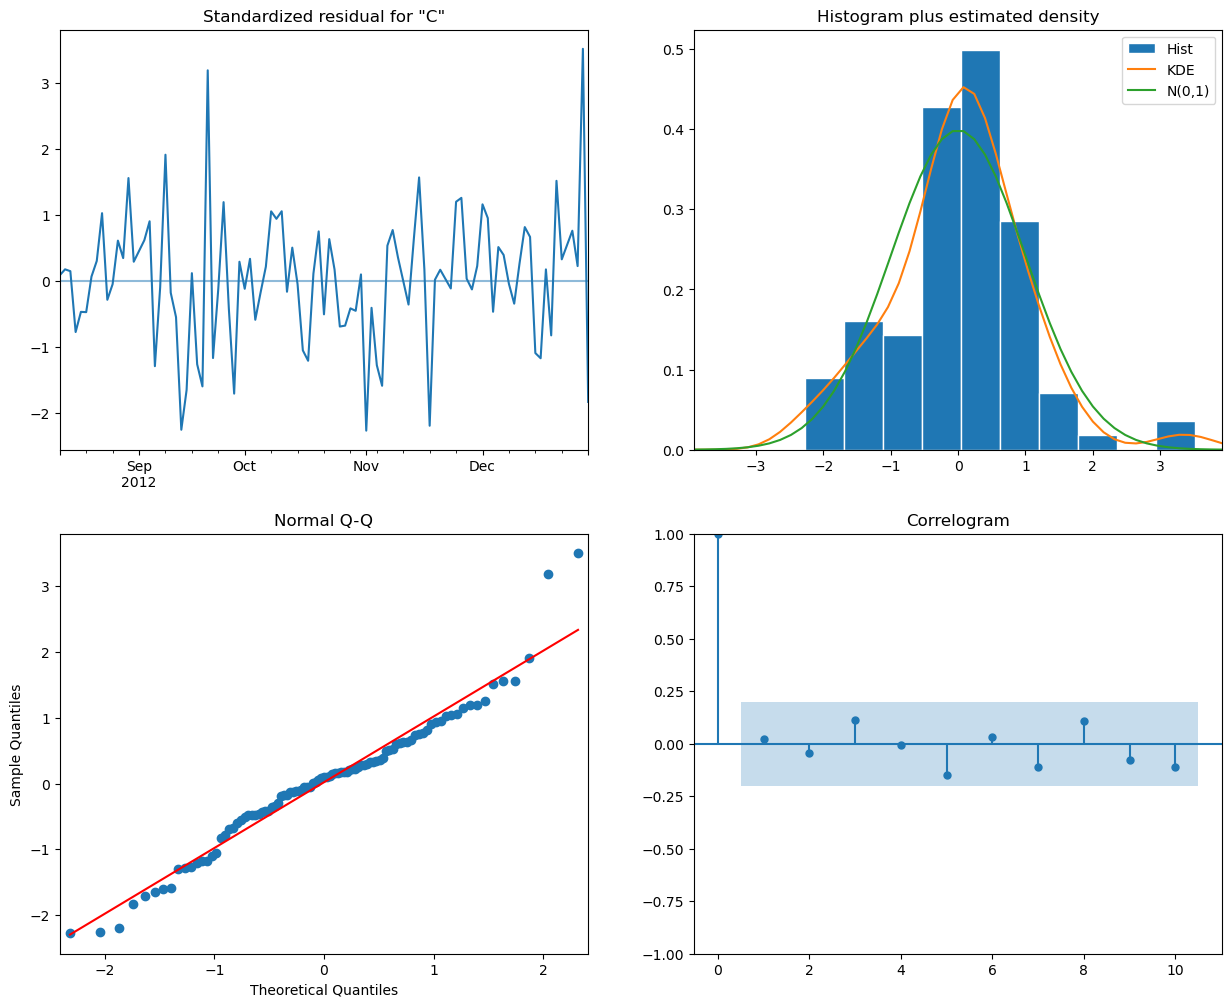

CDX IG Spread_cycle      mean   mean_se  mean_ci_lower  mean_ci_upper
2013-01-02           2.079338  2.016957      -1.873825       6.032501
2013-01-03           0.147571  2.544011      -4.838598       5.133740
2013-01-04          -1.513433  2.735894      -6.875687       3.848820
2013-01-07          -2.787457  2.772147      -8.220765       2.645852
2013-01-08          -3.611775  2.772555      -9.045883       1.822333
2013-01-09          -3.975173  2.817577      -9.497523       1.547178
2013-01-10          -3.911408  2.936330      -9.666509       1.843692
2013-01-11          -3.489414  3.110214      -9.585321       2.606494
2013-01-14          -2.801634  3.298431      -9.266441       3.663173
2013-01-15          -1.951874  3.463685      -8.740572       4.836824


In [37]:
# Diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecasting
forecast = results.get_forecast(steps=10,exog=df_2012['Disaster'].tail(10))
forecast_summary = forecast.summary_frame()
print(forecast_summary)
